In [1]:
# insert graph of top 10 purchased items here... TO DO
import copy

import frozendict
from IPython import display
import ipywidgets as widgets
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from PyScripts.InventoryBook import InventoryBook
from mlxtend.preprocessing import TransactionEncoder
from collections import defaultdict
import decimal

# TODO go into csv file and delete the extra stuff with frozenset as each item is a string. or try ot force frozenset to be set up :)
product_rules = pd.read_csv('Data/master_rules.csv')

In [2]:
te = TransactionEncoder()

In [3]:
with open('Data/transaction_data.csv') as f:
    reader = csv.reader(f)
    items = list(reader)

In [4]:
total_items = 0
for i in range(len(items)):
    total_items += len(items[i])
print(total_items)

38765


In [5]:
te_ary = te.fit(items).transform(items)

In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
numbers = []
for label, content in df.items():
    numbers.append(df[label].sum())

In [8]:
column_names = list(df.columns)

In [9]:
item_frequency = {column_names[i] : numbers[i] for i in range(len(column_names))}

In [10]:
print(str(item_frequency))

{'Instant food products': 60, 'UHT-milk': 306, 'abrasive cleaner': 22, 'artif. sweetener': 29, 'baby cosmetics': 3, 'bags': 4, 'baking powder': 121, 'bathroom cleaner': 17, 'beef': 466, 'berries': 311, 'beverages': 242, 'bottled beer': 619, 'bottled water': 833, 'brandy': 38, 'brown bread': 530, 'butter': 493, 'butter milk': 253, 'cake bar': 89, 'candles': 66, 'candy': 210, 'canned beer': 644, 'canned fish': 115, 'canned fruit': 21, 'canned vegetables': 80, 'cat food': 171, 'cereals': 42, 'chewing gum': 174, 'chicken': 392, 'chocolate': 337, 'chocolate marshmallow': 60, 'citrus fruit': 723, 'cleaner': 31, 'cling film/bags': 73, 'cocoa drinks': 16, 'coffee': 448, 'condensed milk': 93, 'cooking chocolate': 15, 'cookware': 17, 'cream': 12, 'cream cheese ': 345, 'curd': 471, 'curd cheese': 46, 'decalcifier': 9, 'dental care': 33, 'dessert': 337, 'detergent': 127, 'dish cleaner': 73, 'dishes': 133, 'dog food': 67, 'domestic eggs': 519, 'female sanitary products': 40, 'finished products': 64

In [11]:
value1 = sum([x for x in item_frequency.values()])
print(value1)

34766


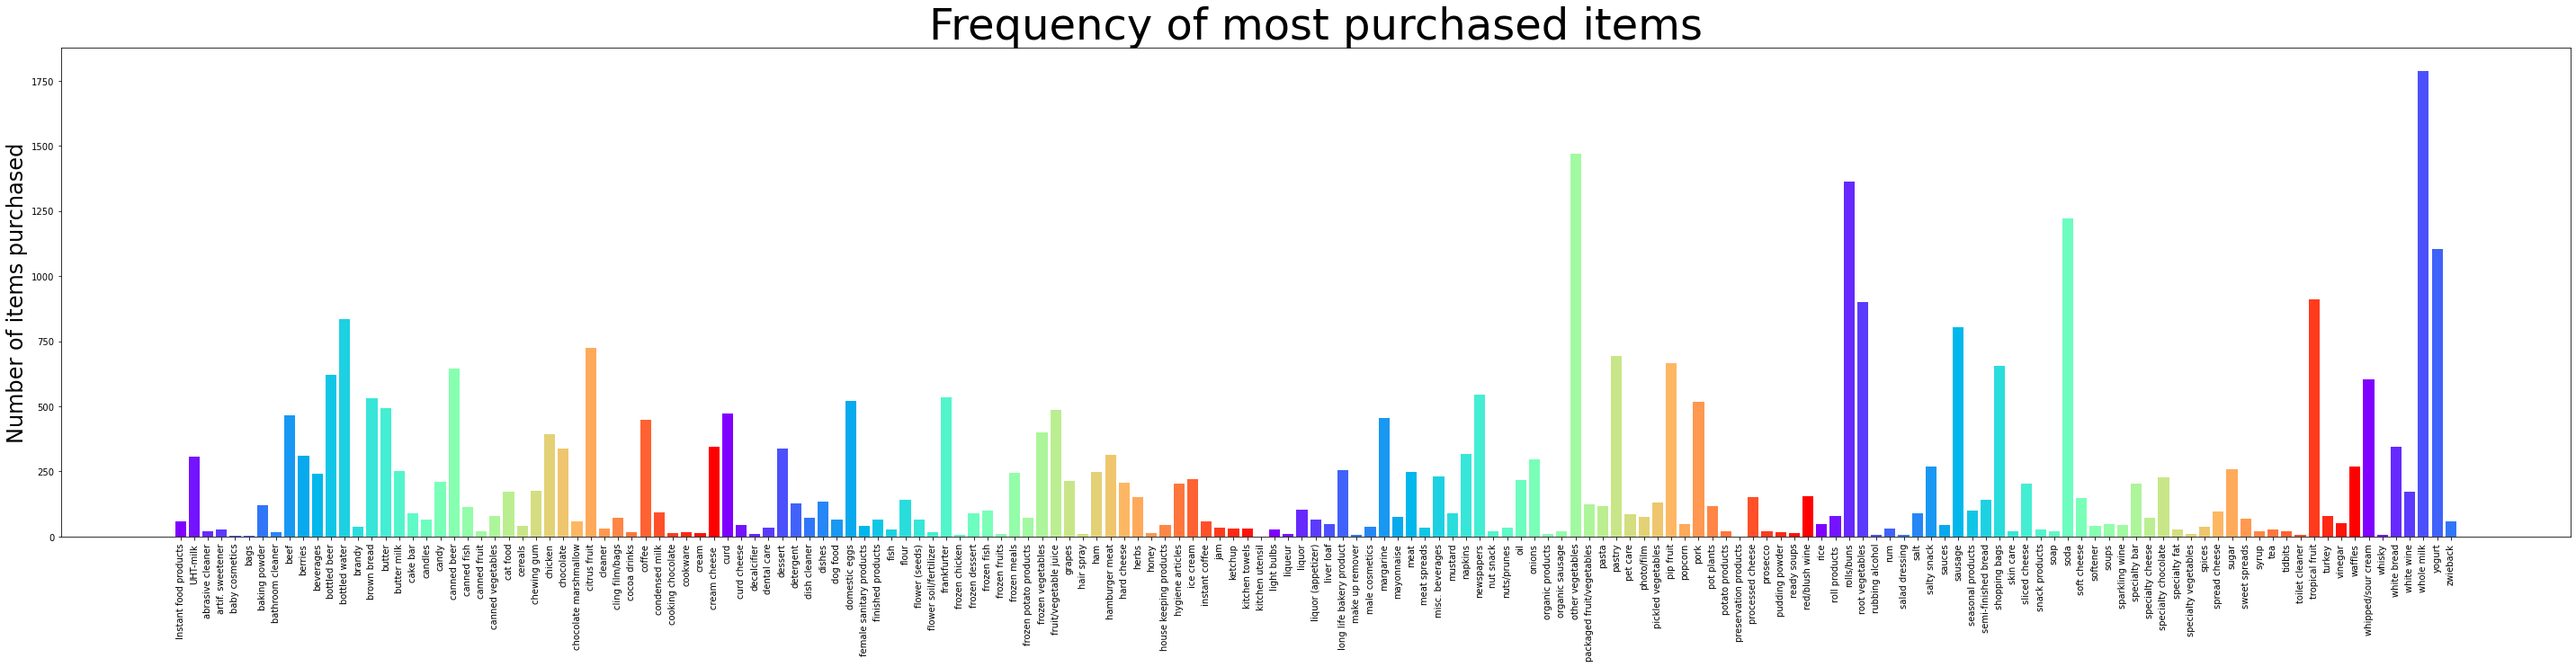

In [12]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
x = item_frequency.keys()
y = item_frequency.values()
fig = plt.figure(figsize=(50,10))
plt.ylabel("Number of items purchased", fontsize = 24)
plt.title("Frequency of most purchased items", fontsize= 48)
plt.bar(x,y, color=color)
plt.xticks(rotation=90)
plt.show()

In [13]:
dict_from_items = dict.fromkeys(item_frequency.copy().keys(), 0.0)
print(str(dict_from_items))

{'Instant food products': 0.0, 'UHT-milk': 0.0, 'abrasive cleaner': 0.0, 'artif. sweetener': 0.0, 'baby cosmetics': 0.0, 'bags': 0.0, 'baking powder': 0.0, 'bathroom cleaner': 0.0, 'beef': 0.0, 'berries': 0.0, 'beverages': 0.0, 'bottled beer': 0.0, 'bottled water': 0.0, 'brandy': 0.0, 'brown bread': 0.0, 'butter': 0.0, 'butter milk': 0.0, 'cake bar': 0.0, 'candles': 0.0, 'candy': 0.0, 'canned beer': 0.0, 'canned fish': 0.0, 'canned fruit': 0.0, 'canned vegetables': 0.0, 'cat food': 0.0, 'cereals': 0.0, 'chewing gum': 0.0, 'chicken': 0.0, 'chocolate': 0.0, 'chocolate marshmallow': 0.0, 'citrus fruit': 0.0, 'cleaner': 0.0, 'cling film/bags': 0.0, 'cocoa drinks': 0.0, 'coffee': 0.0, 'condensed milk': 0.0, 'cooking chocolate': 0.0, 'cookware': 0.0, 'cream': 0.0, 'cream cheese ': 0.0, 'curd': 0.0, 'curd cheese': 0.0, 'decalcifier': 0.0, 'dental care': 0.0, 'dessert': 0.0, 'detergent': 0.0, 'dish cleaner': 0.0, 'dishes': 0.0, 'dog food': 0.0, 'domestic eggs': 0.0, 'female sanitary products':

In [14]:
for i in range(len(dict_from_items)):
    dict_from_items.update({column_names[i] : ((item_frequency.get(column_names[i])) / 34766.0)})
print(str(dict_from_items))

{'Instant food products': 0.0017258240809986769, 'UHT-milk': 0.008801702813093252, 'abrasive cleaner': 0.0006328021630328482, 'artif. sweetener': 0.0008341483058160272, 'baby cosmetics': 8.629120404993384e-05, 'bags': 0.00011505493873324512, 'baking powder': 0.003480411896680665, 'bathroom cleaner': 0.0004889834896162918, 'beef': 0.013403900362423057, 'berries': 0.008945521486509808, 'beverages': 0.00696082379336133, 'bottled beer': 0.017804751768969684, 'bottled water': 0.023960190991198296, 'brandy': 0.0010930219179658286, 'brown bread': 0.01524477938215498, 'butter': 0.014180521198872462, 'butter milk': 0.007277224874877754, 'cake bar': 0.002559972386814704, 'candles': 0.0018984064890985445, 'candy': 0.006040384283495369, 'canned beer': 0.018523845136052465, 'canned fish': 0.0033078294885807973, 'canned fruit': 0.0006040384283495369, 'canned vegetables': 0.0023010987746649027, 'cat food': 0.004918598630846229, 'cereals': 0.0012080768566990739, 'chewing gum': 0.005004889834896163, 'c

In [15]:
new_list_1 = sorted(dict_from_items.items(), key=lambda kv:(kv[1], kv[0]))

In [16]:
print(new_list_1)

[('kitchen utensil', 2.876373468331128e-05), ('preservation products', 2.876373468331128e-05), ('baby cosmetics', 8.629120404993384e-05), ('bags', 0.00011505493873324512), ('frozen chicken', 0.00014381867341655642), ('make up remover', 0.00014381867341655642), ('rubbing alcohol', 0.00014381867341655642), ('toilet cleaner', 0.00014381867341655642), ('salad dressing', 0.00017258240809986768), ('whisky', 0.00023010987746649024), ('decalcifier', 0.0002588736121498015), ('hair spray', 0.0002588736121498015), ('liqueur', 0.0002588736121498015), ('organic products', 0.00028763734683311283), ('frozen fruits', 0.0003164010815164241), ('specialty vegetables', 0.0003164010815164241), ('cream', 0.00034516481619973537), ('honey', 0.00037392855088304663), ('cooking chocolate', 0.0004314560202496692), ('ready soups', 0.0004314560202496692), ('cocoa drinks', 0.0004602197549329805), ('flower soil/fertilizer', 0.0004602197549329805), ('pudding powder', 0.0004602197549329805), ('bathroom cleaner', 0.0004

In [17]:
top_ten = copy.copy(new_list_1[-1:-11:-1])
print(top_ten)

[('whole milk', 0.05137203014439395), ('other vegetables', 0.04222516251510096), ('rolls/buns', 0.03920497037335328), ('soda', 0.035149283783006385), ('yogurt', 0.031726399355692346), ('tropical fruit', 0.026203762296496576), ('root vegetables', 0.02585859748029684), ('bottled water', 0.023960190991198296), ('sausage', 0.02309727895069896), ('citrus fruit', 0.020796180176034056)]


In [18]:
items_to_remove = [x[0] for x in copy.copy(top_ten)]
print(items_to_remove)

['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'tropical fruit', 'root vegetables', 'bottled water', 'sausage', 'citrus fruit']


In [19]:
for i in range(len(items_to_remove)):
    dict_from_items.pop(items_to_remove[i])
print(str(dict_from_items))

{'Instant food products': 0.0017258240809986769, 'UHT-milk': 0.008801702813093252, 'abrasive cleaner': 0.0006328021630328482, 'artif. sweetener': 0.0008341483058160272, 'baby cosmetics': 8.629120404993384e-05, 'bags': 0.00011505493873324512, 'baking powder': 0.003480411896680665, 'bathroom cleaner': 0.0004889834896162918, 'beef': 0.013403900362423057, 'berries': 0.008945521486509808, 'beverages': 0.00696082379336133, 'bottled beer': 0.017804751768969684, 'brandy': 0.0010930219179658286, 'brown bread': 0.01524477938215498, 'butter': 0.014180521198872462, 'butter milk': 0.007277224874877754, 'cake bar': 0.002559972386814704, 'candles': 0.0018984064890985445, 'candy': 0.006040384283495369, 'canned beer': 0.018523845136052465, 'canned fish': 0.0033078294885807973, 'canned fruit': 0.0006040384283495369, 'canned vegetables': 0.0023010987746649027, 'cat food': 0.004918598630846229, 'cereals': 0.0012080768566990739, 'chewing gum': 0.005004889834896163, 'chicken': 0.011275383995858023, 'chocola

In [20]:
other_item_total = list(dict_from_items.copy().values())
print(other_item_total)
print(len(other_item_total))
answer = sum(other_item_total)
print(answer)
# result = map(lambda x : sum(x), other_item_total)
# print(type(result))
# answer = list(result)
# print("Total is : ", answer[0])
others = ('All other items', answer)
print(others)

[0.0017258240809986769, 0.008801702813093252, 0.0006328021630328482, 0.0008341483058160272, 8.629120404993384e-05, 0.00011505493873324512, 0.003480411896680665, 0.0004889834896162918, 0.013403900362423057, 0.008945521486509808, 0.00696082379336133, 0.017804751768969684, 0.0010930219179658286, 0.01524477938215498, 0.014180521198872462, 0.007277224874877754, 0.002559972386814704, 0.0018984064890985445, 0.006040384283495369, 0.018523845136052465, 0.0033078294885807973, 0.0006040384283495369, 0.0023010987746649027, 0.004918598630846229, 0.0012080768566990739, 0.005004889834896163, 0.011275383995858023, 0.009693378588275901, 0.0017258240809986769, 0.0008916757751826497, 0.0020997526318817235, 0.0004602197549329805, 0.012886153138123455, 0.0026750273255479492, 0.0004314560202496692, 0.0004889834896162918, 0.00034516481619973537, 0.009923488465742392, 0.013547719035839614, 0.001323131795432319, 0.0002588736121498015, 0.0009492032445492722, 0.009693378588275901, 0.0036529943047805325, 0.002099

In [21]:
top_ten.append(others)
print(top_ten)

[('whole milk', 0.05137203014439395), ('other vegetables', 0.04222516251510096), ('rolls/buns', 0.03920497037335328), ('soda', 0.035149283783006385), ('yogurt', 0.031726399355692346), ('tropical fruit', 0.026203762296496576), ('root vegetables', 0.02585859748029684), ('bottled water', 0.023960190991198296), ('sausage', 0.02309727895069896), ('citrus fruit', 0.020796180176034056), ('All other items', 0.6804061439337279)]


In [22]:
value = sum([x[1] for x in top_ten])
print(value)

0.9999999999999996


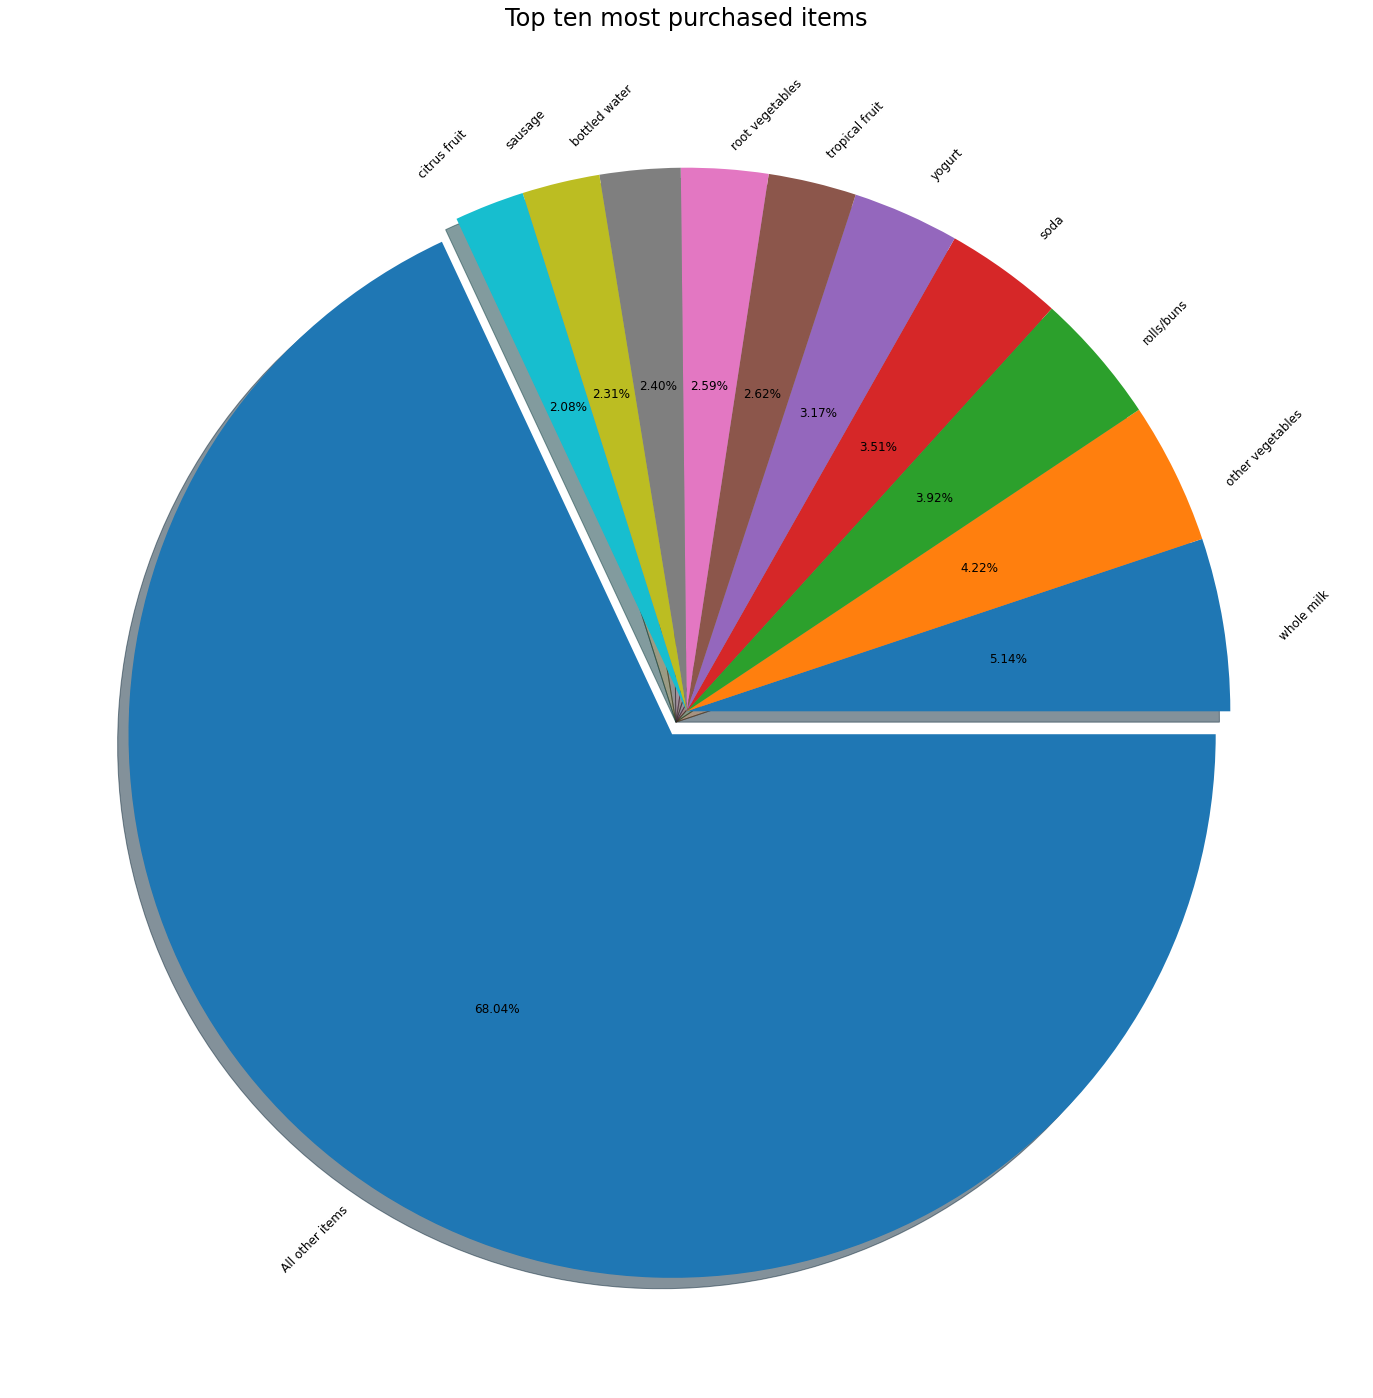

In [50]:

colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.5, len([x[0] for x in top_ten])))
fig1 = plt.figure(figsize=(25,25))
explode = (0,0,0,0,0,0,0,0,0,0,0.05)
patches, texts, autotexts = plt.pie([x[1] for x in top_ten], labels=[x[0] for x in top_ten], explode=explode, shadow=True, autopct='%1.2f%%')
plt.setp(autotexts, size='large')
plt.setp(texts, size='large', rotation=45)
plt.title("Top ten most purchased items", fontsize=24)
plt.show()


In [24]:
%%html
<h1 style="border: 5px dotted red; padding: 10px;font-size: 75px;text-align:center">Welcome to the presentation of the next generation of ShopperzЯUs shopping cart recommendation program!!!</h1>

In [25]:
%%html
<h2 style="text-align:center">Below you can see a few graphs demonstrating the percentages of customers who purchased a particular item. </h2>
<p style="color:orange;font-size: 150px;text-align:center;border: 5px solid yellow"> &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; &darr; </p>

<h3 style="text-align:center;color:blue;font-size: 50px;border: 5px solid gray; padding: 10px"> Here is a wordcloud format of the item-set data used. The larger the word, the more often it occurs in the transaction list. </h3>
<img src="Images/wordcloud.png" alt="WordCloud Image" style="max-width: 100%; height: auto; border: 2px solid red; padding: 5px" >

In [26]:
with open('Data/names.csv') as f:
    read = csv.reader(f)
    names = list(read)

In [ ]:
# df_transaction = pd.read_csv('Data/filtered_transaction_data.csv')
# df_transaction.head()

In [51]:
product_rules.head()

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'Instant food products'}),frozenset({'soda'}),0.015396,0.313318,0.007955,0.516667,1.649017,0.003131,1.420722
1,1,frozenset({'Instant food products'}),frozenset({'whole milk'}),0.015396,0.458045,0.007955,0.516667,1.127983,0.000903,1.121287
2,2,frozenset({'UHT-milk'}),frozenset({'whole milk'}),0.078522,0.458045,0.040544,0.516340,1.127270,0.004577,1.120529
3,3,frozenset({'abrasive cleaner'}),frozenset({'rolls/buns'}),0.005645,0.349756,0.002823,0.500000,1.429567,0.000848,1.300488
4,4,frozenset({'artif. sweetener'}),frozenset({'other vegetables'}),0.007442,0.376700,0.003849,0.517241,1.373086,0.001046,1.291121


In [52]:
print(names)

[['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegetables', 'fruit/vegetable jui

In [54]:
print(names[0][0])

Instant food products


In [66]:
product_rules[product_rules['antecedents'] == frozenset('Instant food products')]

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [69]:
product_rules['antecedents'].dtype

dtype('O')

In [71]:
line = product_rules['antecedents'].iloc[0]
print(line)
print(type(line))

frozenset({'Instant food products'})
<class 'str'>


In [61]:
product_rules.head()

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'Instant food products'}),frozenset({'soda'}),0.015396,0.313318,0.007955,0.516667,1.649017,0.003131,1.420722
1,1,frozenset({'Instant food products'}),frozenset({'whole milk'}),0.015396,0.458045,0.007955,0.516667,1.127983,0.000903,1.121287
2,2,frozenset({'UHT-milk'}),frozenset({'whole milk'}),0.078522,0.458045,0.040544,0.516340,1.127270,0.004577,1.120529
3,3,frozenset({'abrasive cleaner'}),frozenset({'rolls/buns'}),0.005645,0.349756,0.002823,0.500000,1.429567,0.000848,1.300488
4,4,frozenset({'artif. sweetener'}),frozenset({'other vegetables'}),0.007442,0.376700,0.003849,0.517241,1.373086,0.001046,1.291121


'''
Master list of widgets below:
'''
style = {'description_width': 'initial', 'width' : 'max-content'}
inventory_amount_choice = widgets.Select(options=[x for x in range(1,11)],value=1, description='INV amount: ',disabled=False)
inventory_need_qualifier = widgets.RadioButtons(options=['DAILY','WEEKLY','MONTHLY','RARELY'],desciption='Projected Usage of Item',disabled=False)
inventory_list_choices = widgets.Select(options=names_updated,value=names_updated[0],description='Choose Item To Add: ',style=style,disabled=False)
inventory_random_add = widgets.Button(description="Select Random Item",disabled=False, button_style='info',tooltip='Click me to add a random item to the inventory',icon='random')
inventory_save_button = widgets.Button(descriptio='Save To Inventory',disabled=True, button_style='success',tooltip='Click me to save chosen item with amount to inventory',icon='save')
inventory_output = widgets.Output(layout={'border':'5px solid black'}) #TODO add default value
recommendation_output = widgets.Output(value='***Recommendations Go Here***' ,layout={'border':'5px solid black'})
add_user = widgets.Button(description="Create Inventory",disabled=False, button_style='success',tootip='Click me to create a new Inventory Book with the provided owners name.',icon='user-plus')
user_name_input = widgets.Text(value="What's in a name?",description='Enter User Name: ',style=style,disabled=False)

# left_vbox = widgets.VBox(children=[inventory_random_add,inventory_list_choices])
# middle_hbox = widgets.HBox(children=[inventory_amount_choice])
# right_hbox = widgets.HBox(children=[inventory_need_qualifier])
# wrapper_vbox = widgets.VBox(children=[[left_vbox, middle_hbox, right_hbox],[ inventory_save_button]])
# user_input_hbox = widgets.HBox(children=[user_name_input, add_user])
#TODO ... add .on_click method for buttons to process data correctly. capture the button click event

def create_inventory(x):
    global master_inventory
    master_inventory = InventoryBook(user_name_input.value)
    user_name_input.close()
    add_user.close()
    inventory_save_button.disabled = False

def update_inventory(y):
    global master_inventory
    values = [str(inventory_list_choices.value),str(inventory_need_qualifier.value) , int(inventory_amount_choice.value), ]
    master_inventory.add_item(values)

@recommendation_output.capture(wait=True)
def create_recommendation(z):
    global master_inventory
    with recommendation_output:
        text = master_inventory.create_recommendation()
        print(text)

add_user.on_click(create_inventory)
inventory_save_button.on_click(update_inventory)

inventory_list_choices.observe(create_recommendation)

display(user_name_input)
display(add_user)

display(inventory_list_choices)

display(inventory_need_qualifier)

display(inventory_amount_choice)

display(inventory_random_add)
display(inventory_save_button)

display(inventory_output)

display(recommendation_output)

<p>By utilizing the previous shoppers habits as training data, our new ShoppingKart app will display <b>real-time</b> recommendations for additional items to add to the user's inventory.</p>

<p> This demonstration will show the recommendation portion of the app off. The development team at ShopperzЯUs are finishing up the Android based app for our customers to utilize daily for their grocery inventory, and shopping needs!! </p>

<p> The item database is over <strong>30,000</strong> unique items that can be added. The android app is going to process the input from the customer when creating their inventory to match up to the best item we have availble in order to make re-ordering and also upselling a breeze for the customer and profits for the company!! </p>

<p> Below is a mock inventory builder. You can either select an item from the list, or add a random item from our inventory base to the inventory list along with the amount currently on hand. This system will dynamically generate both, the top recommended item(s) based on what has been entered, and will also generate the data associated behind the machine-learning based process of assosication that creates the recommondations via graphs. It also displays the confidence level for the recommendation that was made.</p>

In [28]:
# put GUI here TO DO


<p style="border: 5px solid red; font-size: 35px; text-align:center; padding: 15px"> We are anxiously awaiting the completion of the Android app to fully utilize the recommendation program and ensure better profits and more sales and happy customers!!!</p>

<div style="float: left; text-align:center; border: 5px dotted purple; padding: 15px; font-size: 30px">CopyRight &copy; Catch22Software 2022</div>
<div style="text-align:center; padding: 15px">
<img src="Images/curveball.jpg" alt="Company Logo" width="200" height="200"></div>